# Estudo da luminancia necessária para ambeinte comercial

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()
plt.rc('figure', figsize = (18,15))

### Planilha com as áreas calculadas para cada ambiente a ser projetado

In [3]:
Areas = pd.read_excel('AreasParaIluminacao.xlsx')
Areas.head()

Abiente  ...                                        Referências
0         Mesas Fixas  ...                                                NaN
1     Mesas Rotativas  ...  http://www.bellaitalia.com.br/produto/plafon-l...
2  Salas de Reunião P  ...  http://www.bellaitalia.com.br/produto/pendente...
3   Sala de Reunião G  ...  http://www.bellaitalia.com.br/produto/pendente...
4  Área de Trabalho 1  ...  https://www.iluminim.com.br/luminaria-plafon-3...

[5 rows x 21 columns]

### ro_1 = 0.6
### ro_2 = 0.5
### ro_3 = 0.1

### Definição da função que calcula K de acordo com a norma de lumninotécnica

In [0]:
def calcula_k (L, C, H, Hp, Ht):
  A = L*C
  Hutil = H-Hp-Ht
  K = A/(Hutil*(L+C))
  return K

In [5]:
Areas["Kindex"] = calcula_k(Areas['Largura'], Areas['Comprimento'], Areas['PeDireito'], Areas['Halt'], Areas['Hcha']).round(2)
#Areas["Fu"] = 
Areas

Abiente  ...  Kindex
0             Mesas Fixas  ...    2.74
1         Mesas Rotativas  ...    1.83
2      Salas de Reunião P  ...    1.28
3       Sala de Reunião G  ...    1.41
4      Área de Trabalho 1  ...    1.38
5      Área de Trabalho 2  ...    0.95
6    Área de Covivência 1  ...    1.18
7   Área de Convivência 2  ...    1.30
8              Banheiro 1  ...    0.69
9              Banheiro 2  ...    0.69
10           Banheiro PNE  ...    0.57
11                Sala TI  ...    0.55
12          Almocharifado  ...    0.45
13                   Café  ...    1.34
14     Área de Circulaçãp  ...    1.00
15               Recepção  ...    0.94

[16 rows x 22 columns]

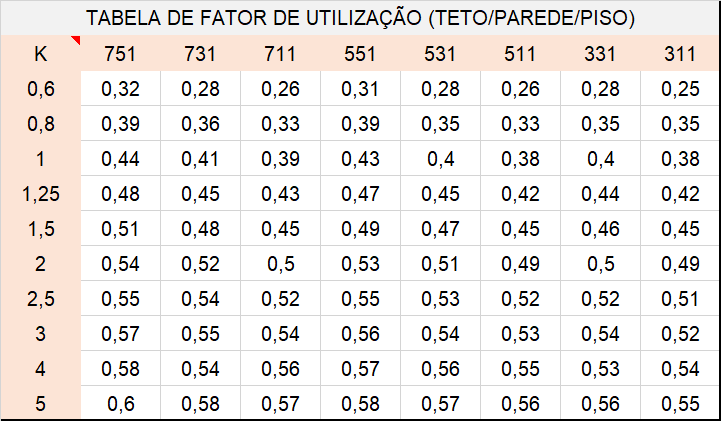

In [0]:
K_table = pd.read_excel('TabelaK.xlsx')

In [7]:
K_table.columns

Index(['K', 751, 731, 711, 551, 531, 511, 331, 311], dtype='object')

In [8]:
teste_k = Areas[["Index","Kindex"]]
teste_k

Index  Kindex
0     551    2.74
1     551    1.83
2     551    1.28
3     551    1.41
4     551    1.38
5     551    0.95
6     551    1.18
7     551    1.30
8     731    0.69
9     711    0.69
10    731    0.57
11    751    0.55
12    751    0.45
13    751    1.34
14    551    1.00
15    551    0.94

0.56,0.53,0.49,0.49,0.49,0.43,0.47,0.49,0.36,0.33,0.36,0.32,0.32,0.51,0.43,0.43

### Adicionando os indices de refração de acordo com a cor e tamanho de cada ambiente

In [0]:
Indices = pd.DataFrame([0.56,0.53,0.49,0.49,0.49,0.43,0.47,0.49,0.36,0.33,0.36,0.32,0.32,0.51,0.43,0.43], columns=["Fu"])
Areas_tratadas = Areas.join(Indices)

In [10]:
Areas_tratadas

Abiente  Largura  ...  Kindex    Fu
0             Mesas Fixas     7.54  ...    2.74  0.56
1         Mesas Rotativas     6.53  ...    1.83  0.53
2      Salas de Reunião P     6.07  ...    1.28  0.49
3       Sala de Reunião G     5.00  ...    1.41  0.49
4      Área de Trabalho 1     6.42  ...    1.38  0.49
5      Área de Trabalho 2     4.47  ...    0.95  0.43
6    Área de Covivência 1     4.47  ...    1.18  0.47
7   Área de Convivência 2     4.19  ...    1.30  0.49
8              Banheiro 1     3.42  ...    0.69  0.36
9              Banheiro 2     3.40  ...    0.69  0.33
10           Banheiro PNE     2.25  ...    0.57  0.36
11                Sala TI     2.33  ...    0.55  0.32
12          Almocharifado     2.33  ...    0.45  0.32
13                   Café     7.61  ...    1.34  0.51
14     Área de Circulaçãp     9.94  ...    1.00  0.43
15               Recepção     4.19  ...    0.94  0.43

[16 rows x 23 columns]

### Definir função que calcula a quantidade de lampadas de acordo com as definições

In [0]:
def calcula_lampadas ( Em, L, C, Fu, inicio, fim, z):
  result = []
  A = L*C
  Fd = 1.25
  for i in range (inicio, fim):
    n = ((Em*A*Fd)/(i*Fu)).round(0)
    if n == 0:
      n = 1
    else:
      n = n
    Lumi = (n/z)
    tabela = [i,n,Lumi]
    result.append(tabela)
  resultados = pd.DataFrame(result, columns= ["luminancia", "lampadas", "luminarias"]) 
  return resultados

In [12]:
Areas_tratadas.head(1)

Abiente  Largura  Comprimento  ...  Referências  Kindex    Fu
0  Mesas Fixas     7.54         6.73  ...          NaN    2.74  0.56

[1 rows x 23 columns]

In [0]:
Areas_2 = Areas_tratadas #.set_index(["Abiente"])

In [14]:
Areas_2.head(1)

Abiente  Largura  Comprimento  ...  Referências  Kindex    Fu
0  Mesas Fixas     7.54         6.73  ...          NaN    2.74  0.56

[1 rows x 23 columns]

In [0]:
dados = pd.DataFrame()
tab = pd.DataFrame()
for i in Areas_2.index:
  tab = calcula_lampadas(Areas_2.IndiceLuminancia.iloc[i]
                         , Areas_2.Largura.iloc[i]
                         , Areas_2.Comprimento.iloc[i]
                         , Areas_2.Fu.iloc[i],
                         500, 6000, 1)
  tab["Ambiente"] = Areas_2.Abiente.iloc[i]
  dados = pd.concat([dados,tab])


### Graficos para análise

Aqui eu usei o pacote xkcd por mera estética, dado que se tratava de um projeto particular para provar um ponto (que a quantidade de lampadas cai com 1/x de lumiunância)

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


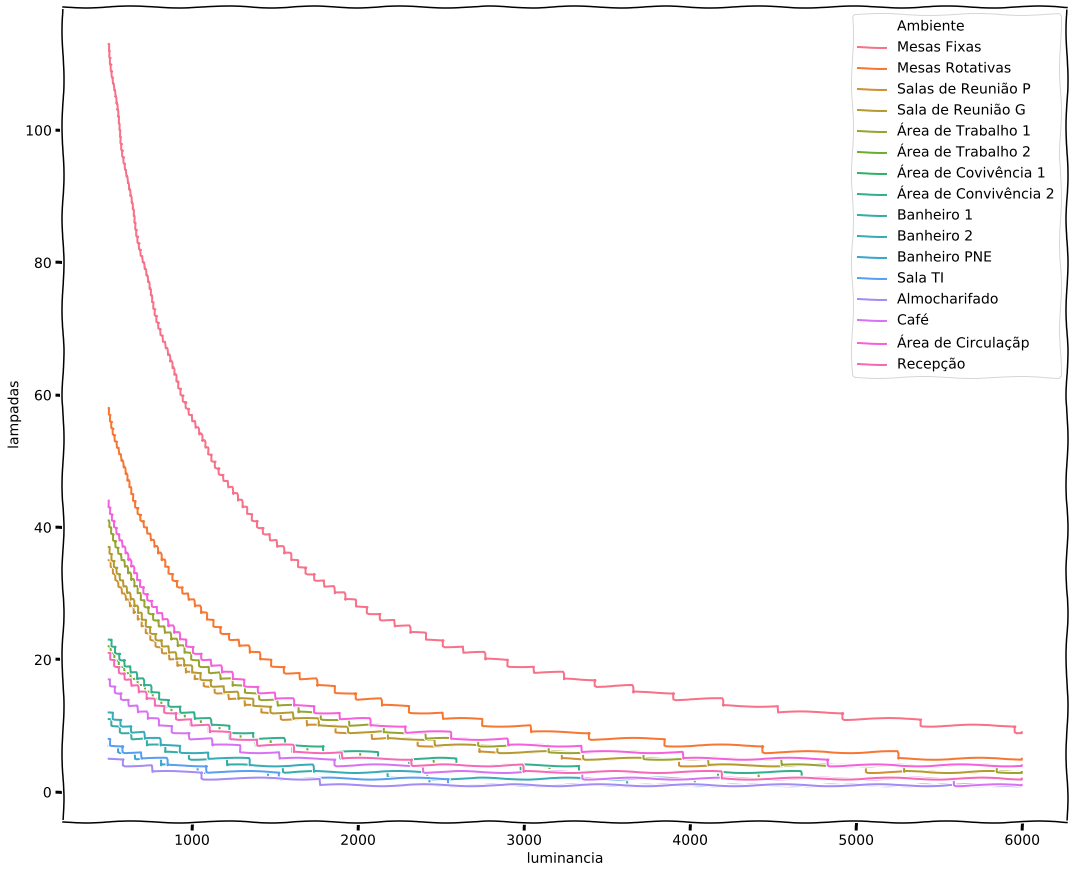

In [16]:
sns.lineplot(x = "luminancia",y= "lampadas", data = dados, hue="Ambiente" )

In [17]:
dados.describe()

luminancia      lampadas    luminarias
count  88000.000000  88000.000000  88000.000000
mean    3249.500000      6.726125      6.726125
std     1587.722235      9.216924      9.216924
min      500.000000      1.000000      1.000000
25%     1874.750000      2.000000      2.000000
50%     3249.500000      4.000000      4.000000
75%     4624.250000      8.000000      8.000000
max     5999.000000    113.000000    113.000000

In [18]:
dados

luminancia  lampadas  luminarias     Ambiente
0            500     113.0       113.0  Mesas Fixas
1            501     113.0       113.0  Mesas Fixas
2            502     113.0       113.0  Mesas Fixas
3            503     113.0       113.0  Mesas Fixas
4            504     112.0       112.0  Mesas Fixas
...          ...       ...         ...          ...
5495        5995       2.0         2.0     Recepção
5496        5996       2.0         2.0     Recepção
5497        5997       2.0         2.0     Recepção
5498        5998       2.0         2.0     Recepção
5499        5999       2.0         2.0     Recepção

[88000 rows x 4 columns]

## Gráficos para determinar quantas lâmpadas são ideiais para cada Ambiente

Aqui coloquei o gráfico dinâmico para poder interagir com a polotagem da quantidade de lampadas e identificar a luminância necessária para determinada quantidade. Com isso poderia comprar a lâmpada mais adequada para cada ambiente

In [19]:
import plotly.express as px
fig = px.line(dados, x="luminancia", y="lampadas", line_group="Ambiente")
fig.show()

In [20]:
fig = px.scatter(dados, x="luminancia", y="lampadas", hover_data=["Ambiente"])
fig.show()

In [0]:
lampadas = [500,1200, 1160, 1240, 1300, 1690, 1850,1900, 2100, 	2125, 2480, 2670,2880, 3000,3500, 4300]

In [22]:
lampadas

[500,
 1200,
 1160,
 1240,
 1300,
 1690,
 1850,
 1900,
 2100,
 2125,
 2480,
 2670,
 2880,
 3000,
 3500,
 4300]

In [0]:
def calcula_lampadas ( Em, L, C, Fu, lampadas, z):
  result = []
  A = L*C
  Fd = 1.25
  for i in lampadas:
    n = ((Em*A*Fd)/(i*Fu)).round(0)
    Lumi = (n/z).round(0)
    tabela = [i,n,Lumi]
    result.append(tabela)
  resultados = pd.DataFrame(result, columns= ["luminancia", "lampadas", "luminarias"]) 
  return resultados

Vamos construir um novo data frame para poder testar algumas lampadas específicas, dado que as quantidade de lumen não são continuas nos fabricantes (respeitam alguns patamares)

In [0]:
dados_2 = pd.DataFrame()
tab = pd.DataFrame()
for i in Areas_2.index:
  tab = calcula_lampadas(Areas_2.IndiceLuminancia.iloc[i]
                         , Areas_2.Largura.iloc[i]
                         , Areas_2.Comprimento.iloc[i]
                         , Areas_2.Fu.iloc[i],
                         lampadas, 1)
  tab["Ambiente"] = Areas_2.Abiente.iloc[i]
  dados_2 = pd.concat([dados_2,tab])

In [25]:
fig = px.scatter(dados_2, x="luminancia", y="lampadas", hover_data=["Ambiente"], color="Ambiente")
fig.show()

# Conclusão

Pudemos plotar iterativamente a a quantidade de lampada vs a luminancia para cada ambiente (curvas) afim de determinar a quantidade de lâmpadas que seriam necessárias/desejaveis para cada ambiente a ser projetado.
Com o conhecimento prévio das especificações dos ambientes podemos determinar a luminancia necessária para comprar de cada lâmpada de uma forma mais rápida, evitando testes desnecessários na obra